In [3]:
import pandas as pd
import numpy as np
import re

import pickle

# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image # for world cloud image


# NLTK libraries
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

from collections import Counter
from itertools import chain

# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_lg")


# Avoid warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("beer_final1.csv")
df1 = df[['Beer_name','User','Comment']]

## drop rows with '-' values
df1.drop(df1[df1['Comment'] == '-'].index, inplace = True)

In [5]:
# check for null values
df1.isnull().sum()

Beer_name    0
User         0
Comment      0
dtype: int64

# DATA CLEANING

In [6]:
# Remove the extra char (!, , , and so on)

df1['Comment'] = df1['Comment'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

# Remove the spaces between two lines

df1['Comment'] = df1['Comment'].apply(lambda x: " ".join(x.split()))

# change to lower case

df1['Comment'] = df1['Comment'].map(lambda x: x.lower())
df1.Comment



# This function convert our columns values into 1*1 array


#df1.Comment.values



0        poured from a howler from collective here in c...
3        as a german albertan i dont know why i was so ...
4        wow why did i ever have trepidation about this...
5        simply a stellar rendition from right here in ...
7        very authentic tasting hefeweizen can compete ...
                               ...                        
14664    from club del gourmet of el corte ingles in ik...
14665    apours a golden color with a slight head and l...
14678    nothing more than moosehead with water added t...
14681    serving type ml bottle having been born and ra...
14685    pale yellow pour small white head with low ret...
Name: Comment, Length: 5248, dtype: object

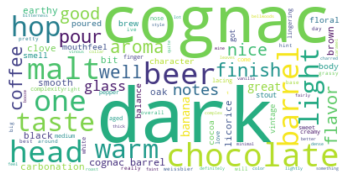

In [373]:
# Join the review.
long_string = ','.join(list(df1.Comment.values))

# Import the image of a car to have it as mask
beer_mask = np.array(Image.open("beer.jpg"))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("beer_reviw.png")

In [7]:
# Setting up the stop-words
nltk.download('stopwords')
stop_words = stopwords.words('english')
# stop_words.extend(['])
stop_words.extend(['like','good','come','bought','year','minute','home', 'work','think','suv','people','japan','second',
                   'awsome','one','now', 'take', 'give', 'new','love','conv','grocery','test','etc','great','german'
                   ,'well','fahr','mild','world','best','wonderfully','carbonation','got','pour','poured','glass','perfect','bready'
                  ,'bottle','feel','quite','trying','overall','glass','know','brew','finger','along','style','alberta','touch','much','chips'
                  ,'love','right','recommended','lace','brewery','colour','head','tap','hesitant','zoom','time','earthy','ive','weissbier',
                  'crackery','lingering','around','one','bodied','rassy','golden','well','refreshing','right','albertan','fruitiness'
                  ,'balance','highlight','beer','miss','nice','warm','hop','floral','fahrly','simply','quality','utilize','rendition','offdry'
                   ,'lovely','maybe','soon','taste','malt','hint','dark','aroma','fruit','roasted','very','brand','can','middleweight','bubblegum','less','loosely','leave','regret','note','accurately','slightly'
                  ])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15147\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def lematized_review(text): # text
    rev_text = nlp(text)
    # Extract lematized words in lower case format if not digits, not punctuation, not stopword, and length not less than 2
    rev_text = ([token.lemma_.lower() for token in rev_text if not token.is_stop and token.text not in stop_words and not token.is_punct and len(token.text) > 3])
    return rev_text

In [9]:
%%time
# Applying the function on the reviews 

df1['Comment'] = df1['Comment'].apply(lematized_review)

Wall time: 2min 2s


In [10]:
df_comment = df1[['Beer_name','Comment']]
pickle.dump(df_comment,open('df_comment.pkl','wb'))

<AxesSubplot:ylabel='Word'>

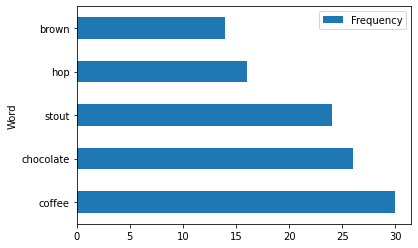

In [16]:


def top_words(Beer):
    df_new = df1[df1['Beer_name']== Beer]
    clean_review = df_new['Comment']
    clean_review.dropna()
    p = Counter(" ".join(list(map(str, clean_review))).split()).most_common(5)
    rslt = pd.DataFrame(p, columns=['Word', 'Frequency'],index =None)
    rslt['Word'] = rslt['Word'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
    graph = rslt.plot(y="Frequency", x="Word", kind="barh")

    return graph
 
    

top_words('Dandy In The UnderworldThe Dandy Brewing Company')